##  Slopechart


##### Credit:
Largely replicated from https://github.com/empathy87/storytelling-with-data

In [5]:
# Try to use Seaborn/Matplotlib to replicate another cool viz from Cole Nusaumbber Knaflic's book Storytelling with Data.
# Inspiration from :
# https://github.com/adamribaudo/storytelling-with-data-ggplot
# Using code from the excellent:
# https://github.com/empathy87/storytelling-with-data

## Import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import transforms
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FixedLocator, FixedFormatter


In [3]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
BLUE5, BLUE6 = '#92CDDD', '#2E869D'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1, ORANGE2, ORANGE3 = '#F79747', '#FAC090', '#F36721'

In [4]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

In [10]:
# Thank you to Andrey / empathy87 on github

def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, line in enumerate(reversed(text.split('\n'))):
        strings = line.split('||')
        for s, c in zip(strings, colors[i]):
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()
            t = transforms.offset_copy(text._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * spacing, 
                                   units='dots')
        

#### Dummy Data

In [11]:
# survey responses
X = ['Скучно', 'Отстой', 'Нормально', 'Интересно', 'Круто!!!']
Y = [11, 5, 40, 25, 19]
Z = [12, 6, 14, 30, 38]

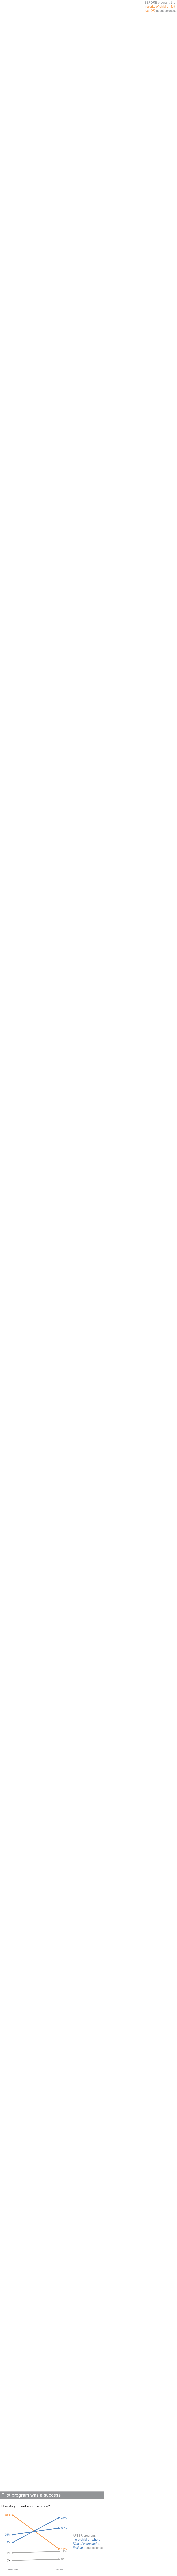

In [104]:
# create new figure

fig = plt.figure(figsize=(8, 6), dpi=100)


ax0 = fig.add_axes( (0,0,1,1))
ax0.axis('Off') # don't draw anything.


ax1 = fig.add_axes((0, 0.1, 0.5, 0.7))

ax2 = ax1.twinx()

# set properties for axes object
plt.setp(ax1,
         xticks=[0, 1],  # two x-ticks only 0 and 1
         xticklabels=['BEFORE', 'AFTER'],  # with text labels
         yticks=Y,  # tick for all pre- responses %
         yticklabels=[str(v) + '%' for v in Y]
        )  # with n% labels

#ax1.tick_params(left='off')
#ax2.tick_params(right='off')

ax2.set_ylim([0, 42])
ax1.set_ylim([0, 42])

# assign colors for responses
C = [GRAY8, GRAY8, ORANGE1, BLUE2, BLUE2]

# draw slopegraph lines with circles at ends
for i in range(5):
    # draw circles
    ax1.scatter([0, 1], [Y[i], Z[i]], color=C[i], s=70)
    # draw line
    ax1.plot([0, 1], [Y[i], Z[i]], color=C[i], linewidth=4)

# set properties for secondary axes object
plt.setp(ax2,
         yticks=Z,  # tick for all post- responses %
         yticklabels=[str(v) + '%' for v in Z])  # with n% labels

# remove chart border
for ax in (ax1, ax2):
    for spine in ax.spines.values():
        spine.set_visible(False)

# configure x tick label appearance
for item in ax1.get_xticklabels():
    item.set_fontsize(14)
    item.set_color(GRAY7)
    # use trasformations to shift x tick labels slightly down
    offset = transforms.ScaledTranslation(0, -0.07, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# configure left y axis.
for i, item in enumerate (ax1.get_yticklabels() ):
    item.set_fontsize(16)
    item.set_color( C[i])
    # use trasformations to shift x tick labels slightly down
    offset = transforms.ScaledTranslation(0.15, 0, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# configure right y axis.
for i, item in enumerate (ax2.get_yticklabels() ):
    item.set_fontsize(16)
    item.set_color( C[i])
    # use trasformations to shift x tick labels slightly down
    offset = transforms.ScaledTranslation(-0.15, 0, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# remove the tick lines (the only way I can)
#ax1.tick_params(axis='y',width=0)
#ax2.tick_params(axis='y',width=0)
    
# change x ticks color
ax1.tick_params(axis='x', colors=GRAY7, length=6)

# add bottom spine with gray color and bounds between 0 and 1
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_bounds(0, 1)
ax1.spines['bottom'].set_color(GRAY7)    

# titile the plot
plt.text(-0.25, 54.3,
         'Pilot program was a success' + ' ' * 32,
         fontsize=26,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': GRAY7,  # background color
               'pad': 10,  # add more padding
               'edgecolor': 'none'})  # no border

# add survey question
plt.text(-0.25, 46, 'How do you feel about science?', fontsize=19, 
         color=GRAY1)


# add before text note highlighthing some words orange
rainbow_text(1.3, 33,
             'BEFORE program, the\n'
             'majority of children felt\n'
             'just $\\mathit{OK}$|| about science.',
             [[GRAY7], [ORANGE1], [ORANGE1, GRAY7]],
             spacing=31.5,
             ax=ax0,
             fontsize=17)

# add after text note highlighthing some words with blue
rainbow_text(1.3, 14,
             'AFTER program,\n'
             'more children where\n'
             '$\\it{Kind\ of\ interested\ &}$\n'
             '$\\it{Excited}$|| about science.',
             [[GRAY7], [BLUE2], [BLUE2], [BLUE2, GRAY7]],
             spacing=31.5,
             ax=ax1,
             fontsize=17)
